In [8]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sb
import os

os.chdir("/Users/gilgu/OneDrive/Escritorio")

from sklearn.cluster import KMeans 

dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
fields = dataset.iloc[:, [3,4]].values                          
print(fields)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [10]:
import warnings
warnings.filterwarnings("ignore")               #para ignorar alertas

In [12]:
wcss = [] #lista vacía                           #calcula la inercia tomando en cuenta las distancias de los puntos
          #para generar el gráfico de codo
          #para guardar los errores que se cometen en cada grupo 
for index in range(1,11):
    kmeans = KMeans(n_clusters = index, init = "k-means++", random_state = 2)     #vamos a correr el algoritmo de kmeans
    kmeans.fit(fields) 
    
    wcss.append(kmeans.inertia_)

# Graficación del codo de Jambu

In [ ]:
#Se va a encargar de determinar en que momento podemos contemplar el número óptimo de clusters

Text(0, 0.5, 'WCSS')

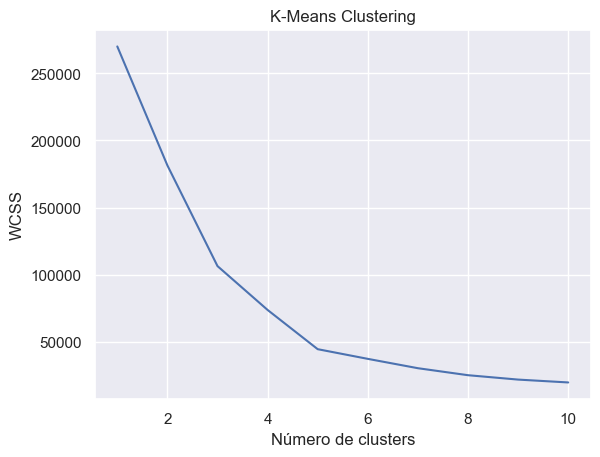

In [13]:
#Graficación 
sb.set()
mp.plot(range(1,11),wcss)
mp.title("K-Means Clustering")
mp.xlabel("Número de clusters")
mp.ylabel("WCSS")     #weighted cluster sum of squares (suma de cuadrados ponderada del grupo)

In [40]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
cluster_values = kmeans.fit_predict(fields)
print(cluster_values)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


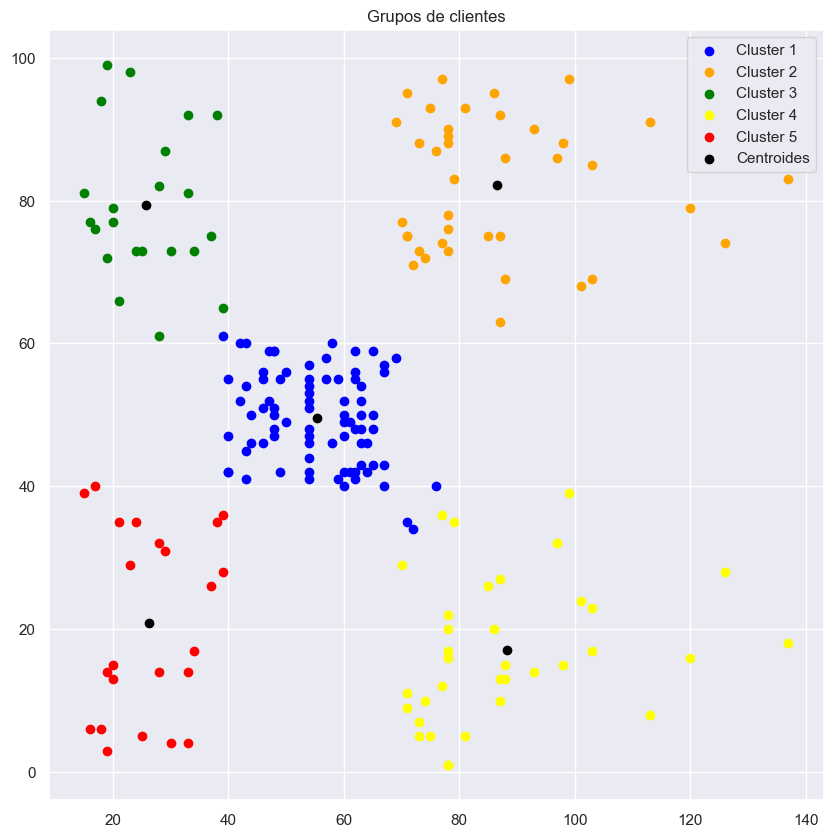

In [41]:
mp.figure(figsize =(10,10))
mp.scatter(fields[cluster_values==0,0], fields[cluster_values==0,1], c = 'blue', label = 'Cluster 1')
mp.scatter(fields[cluster_values==1,0], fields[cluster_values==1,1], c = 'orange', label = 'Cluster 2')
mp.scatter(fields[cluster_values==2,0], fields[cluster_values==2,1], c = 'green', label = 'Cluster 3')
mp.scatter(fields[cluster_values==3,0], fields[cluster_values==3,1], c = 'yellow', label = 'Cluster 4')
mp.scatter(fields[cluster_values==4,0], fields[cluster_values==4,1], c = 'red', label = 'Cluster 5')


#colocar los centroides

mp.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', label = 'Centroides')

mp.title("Grupos de clientes")
mp.xlabel = "Annual income"
mp.ylabel = "Spending Score"
mp.legend()

# Criterio de silueta ("Silhouette")

In [15]:
from sklearn import datasets
from sklearn.metrics import silhouette_score

In [17]:
X = dataset.iloc[:, [3,4]].to_numpy()
for j in range(2,12):
    kmeans = KMeans(n_clusters = j, random_state = 42)
    kmeans.fit_predict(X)
    
#    Calculamos el Score de Silueta

    score = silhouette_score(X, kmeans.labels_, metric = 'euclidean')
    print("Score Silhouette: ", "k =", j, ":", score)

Score Silhouette:  k = 2 : 0.2968969162503008
Score Silhouette:  k = 3 : 0.46761358158775435
Score Silhouette:  k = 4 : 0.4931963109249047
Score Silhouette:  k = 5 : 0.553931997444648
Score Silhouette:  k = 6 : 0.53976103063432
Score Silhouette:  k = 7 : 0.5288104473798049
Score Silhouette:  k = 8 : 0.45481197931195283
Score Silhouette:  k = 9 : 0.4561091950997367
Score Silhouette:  k = 10 : 0.4410568674364981
Score Silhouette:  k = 11 : 0.4489710248005492


# Algoritmo KMeans aplicado a 3 columnas de nuestra base original

# bajo una transformación de PCA

In [49]:
fields2 = dataset.iloc[:, [2,3,4]].values
print(fields2)

[[ 19  15  39]
 [ 21  15  81]
 [ 20  16   6]
 [ 23  16  77]
 [ 31  17  40]
 [ 22  17  76]
 [ 35  18   6]
 [ 23  18  94]
 [ 64  19   3]
 [ 30  19  72]
 [ 67  19  14]
 [ 35  19  99]
 [ 58  20  15]
 [ 24  20  77]
 [ 37  20  13]
 [ 22  20  79]
 [ 35  21  35]
 [ 20  21  66]
 [ 52  23  29]
 [ 35  23  98]
 [ 35  24  35]
 [ 25  24  73]
 [ 46  25   5]
 [ 31  25  73]
 [ 54  28  14]
 [ 29  28  82]
 [ 45  28  32]
 [ 35  28  61]
 [ 40  29  31]
 [ 23  29  87]
 [ 60  30   4]
 [ 21  30  73]
 [ 53  33   4]
 [ 18  33  92]
 [ 49  33  14]
 [ 21  33  81]
 [ 42  34  17]
 [ 30  34  73]
 [ 36  37  26]
 [ 20  37  75]
 [ 65  38  35]
 [ 24  38  92]
 [ 48  39  36]
 [ 31  39  61]
 [ 49  39  28]
 [ 24  39  65]
 [ 50  40  55]
 [ 27  40  47]
 [ 29  40  42]
 [ 31  40  42]
 [ 49  42  52]
 [ 33  42  60]
 [ 31  43  54]
 [ 59  43  60]
 [ 50  43  45]
 [ 47  43  41]
 [ 51  44  50]
 [ 69  44  46]
 [ 27  46  51]
 [ 53  46  46]
 [ 70  46  56]
 [ 19  46  55]
 [ 67  47  52]
 [ 54  47  59]
 [ 63  48  51]
 [ 18  48  59]
 [ 43  48 

In [50]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)
pca.fit(fields2)
fields2 = pca.transform(fields2)
fields2 

array([[-3.18705078e+01, -3.30014253e+01],
       [ 7.63396908e-01, -5.68438653e+01],
       [-5.74087256e+01, -1.31229362e+01],
       [-2.16989648e+00, -5.34779049e+01],
       [-3.21749197e+01, -3.03870050e+01],
       [-2.17827777e+00, -5.22265808e+01],
       [-5.90660565e+01, -9.54170669e+00],
       [ 1.23693261e+01, -6.16176843e+01],
       [-6.63156568e+01, -3.21359934e+00],
       [-5.65677534e+00, -4.72664534e+01],
       [-5.82366179e+01, -9.13375312e+00],
       [ 1.46202592e+01, -6.21072940e+01],
       [-5.51612126e+01, -1.00779778e+01],
       [-4.30660584e-03, -5.01134367e+01],
       [-5.27647474e+01, -1.16804199e+01],
       [ 1.94563480e+00, -5.15231943e+01],
       [-3.45062349e+01, -2.37600734e+01],
       [-7.30573032e+00, -4.35158724e+01],
       [-4.12574933e+01, -1.64734320e+01],
       [ 1.61888268e+01, -5.82998775e+01],
       [-3.27403118e+01, -2.13349462e+01],
       [-9.82702739e-01, -4.44533143e+01],
       [-5.78102821e+01, -1.86854579e+00],
       [-1.

In [51]:
wcss2 = [] 
          
    
for index in range(1,11):
    kmeans = KMeans(n_clusters = index, init = "k-means++", random_state = 2)     
    kmeans.fit(fields2) 
    
    wcss2.append(kmeans.inertia_)

TypeError: 'str' object is not callable

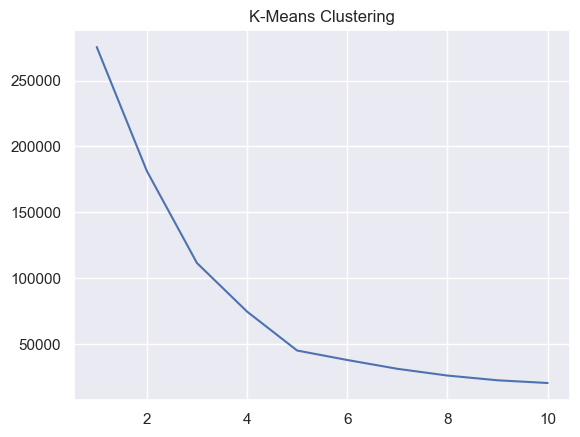

In [52]:
#Graficación del "Code de Jambu"

sb.set()
mp.plot(range(1,11),wcss2)
mp.title("K-Means Clustering")
mp.xlabel("Número de clusters")
mp.ylabel("WCSS")  

In [53]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
cluster_values = kmeans.fit_predict(fields2)
print(cluster_values)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


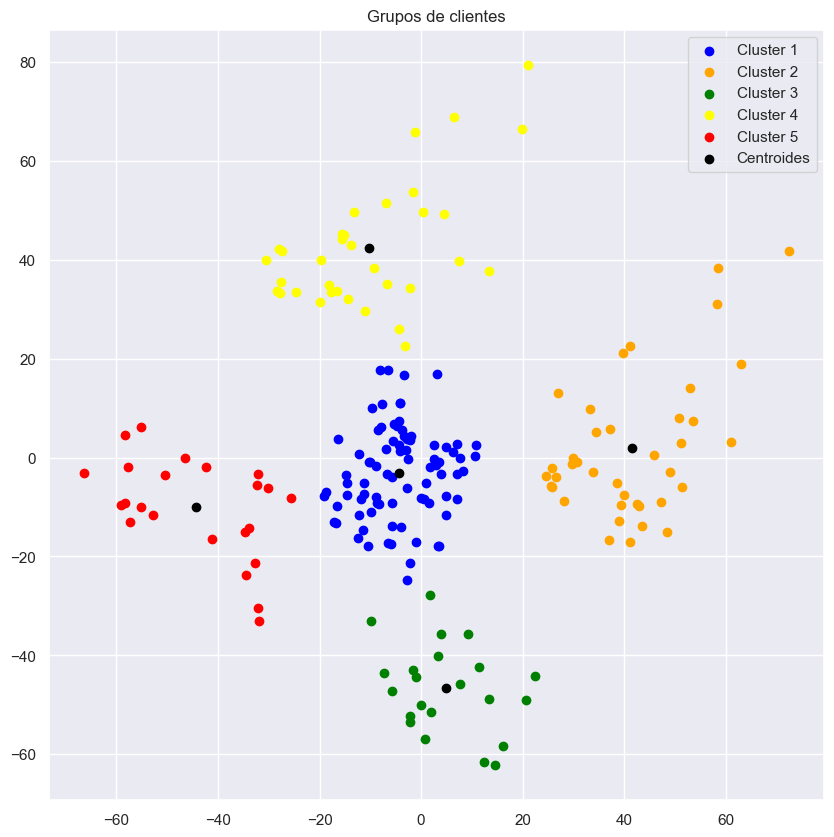

In [54]:
mp.figure(figsize =(10,10))
mp.scatter(fields2[cluster_values==0,0], fields2[cluster_values==0,1], c = 'blue', label = 'Cluster 1')
mp.scatter(fields2[cluster_values==1,0], fields2[cluster_values==1,1], c = 'orange', label = 'Cluster 2')
mp.scatter(fields2[cluster_values==2,0], fields2[cluster_values==2,1], c = 'green', label = 'Cluster 3')
mp.scatter(fields2[cluster_values==3,0], fields2[cluster_values==3,1], c = 'yellow', label = 'Cluster 4')
mp.scatter(fields2[cluster_values==4,0], fields2[cluster_values==4,1], c = 'red', label = 'Cluster 5')


#colocar los centroides

mp.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', label = 'Centroides')

mp.title("Grupos de clientes")
mp.xlabel = "Annual income"
mp.ylabel = "Spending Score"
mp.legend()